## Seaborn 플로팅 함수 개요

이 장에서는 다양한 함수에 대한 개괄적 소개를 다룬다

### 유사한 작업에 대한 유사기능
모든 기능은 최상위 수준에서 접근 가능하다.  
관계형, 분산형, 범주형 데이터에 따라 시각화 할 수 있는 모듈은 여러개가 있지만 각  모듈에 여러 기능을 공통으로 사용 가능하다.

예를 들어, distribution 모듈은 데이터 포인트의 분포를 나타내는데 특화된 함수를 정의한다.  
여기에는 histogram과 같은 친숙한 방법이 포함되어 있다.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

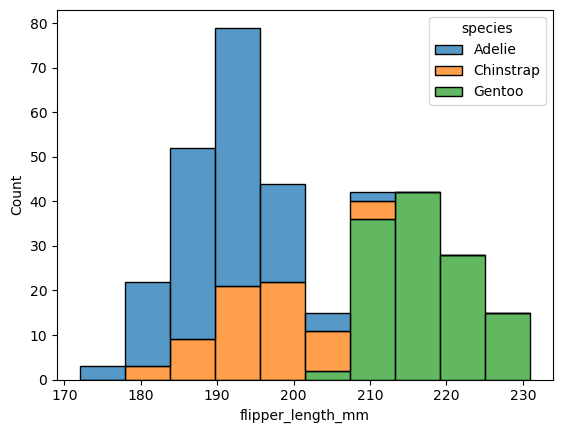

In [5]:
# histplot으로 데이터의 히스토그램을 볼수 있다.
# hue = 'species'는 해당 컬럼의 분류에 따라 다른 색으로 나타나게 한다.
# multiple = 'stack' 은 하나의 막대에 여러 막대가 쌓여 나오도록 한다.
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

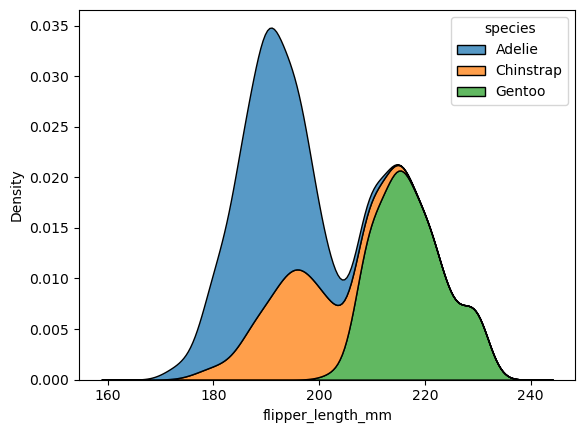

In [4]:
# kdeplot은 데이터의 값을 곡선으로 나타내 준다.
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

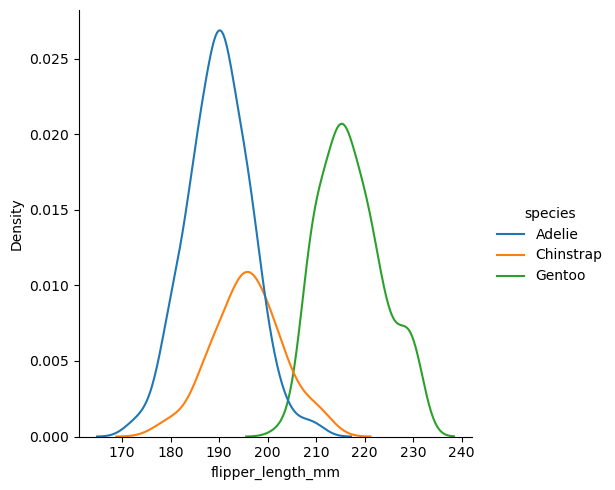

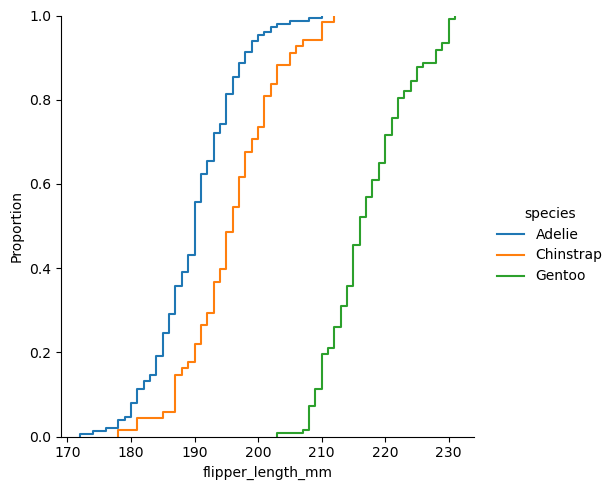

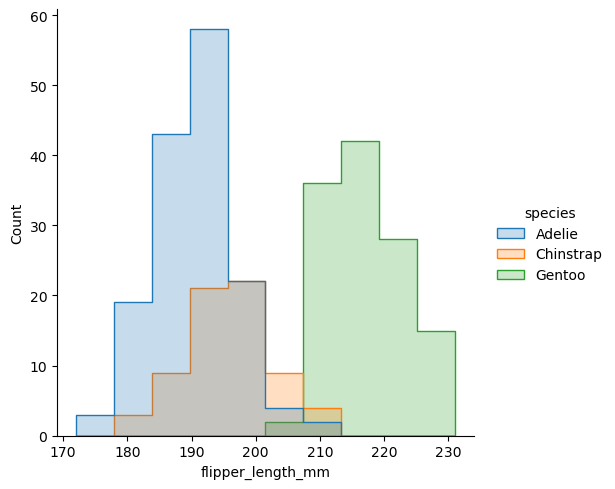

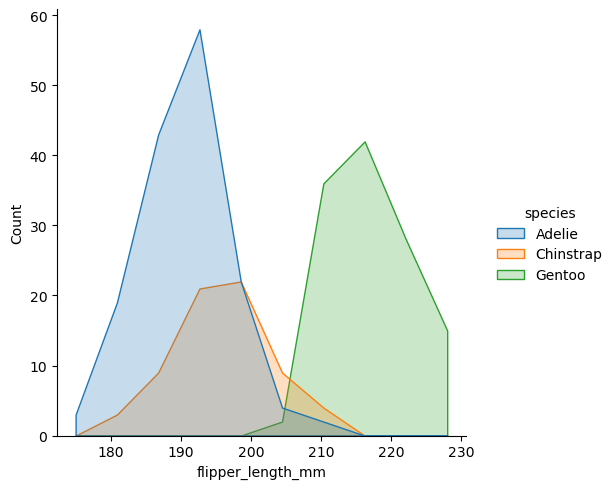

In [8]:
# displot에다가 kind, element 설정을 통해 그래프를 여러 이미지로 시각화 할 수 있다.
# 하지만 해당 값들은 stack해서 나타낸 것이 아니란 것을 참고.
# hue = '컬럼' : 지정된 컬럼의 unique한 값의 색을 다르게 지정한다
# kind ='' : 해당 그래프의 종류를 바꾼다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind='kde')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind='ecdf')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", element='step')
sns.displot(data=penguins, x="flipper_length_mm", hue="species", element='poly')

### 그래프 수준 vs 축 수준 함수

Seaborn은 '축 수준' 과 '그래프 수준'으로 교차 분류가 된다.  

  
그림 수준 함수 FacetGrid는 그림을 관리하는 Seaborn 객체(보통 a)를 통해 matplolib에 인터페이스 합니다. 각 모듈에는 다양한 축수준 기능에 대한 단일 인터페이스를 제공하는 단일 그림 수준 기능이 있다.   
조직은 아래와 같다.
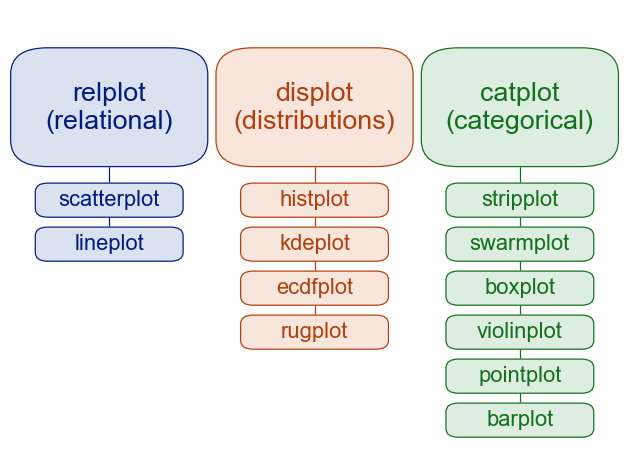

- 예를 들어 displot()은 분포 모듈의 그림 수준 함수이다.  
- histplot() 기본 동작은 뒤에서와 동일한 코드를 사용하여 히스토그램을 그리는 것이다.


### 그래프 수준 함수(figure-level)
1. 상위 함수로 그래프의 종류를 지정하는 파라미터를 사용해 데이터를 시각화한다.
2. displot(), catplot(), relplot() => seaborn.axisgrid.FacetGrid를 만든다.
3. matplotlib과 별개로 Seaborn의 figure를 만들어 그곳에 plotting 한다
4. 장점 : col 파라미터로 groupby를 할 수있다.
5. label이 그래프 밖에 있다.
  
### 축 수준 함수(axes-level)
1. 각 그래프의 종류에 특화된 함수이다.
2. 1가지 그래프를 그리는데 맞춤화 되어 있다.
3. countplot(), histplot(), stripplot() => AxesSubplot을 만든다
4. 다만, Matplotlib과의 호환이나 한 그래프위에 다른 그래프를 겹쳐 그릴 수 있다는 점에서 축 수준의 함수가 그래프 수준 함수보다 조금 더 유연하다.
5. 그래프 수준으로 그릴 수 없는 그래프는 축 수준 함수로 그린다.
6. matplotlib의 axes에 그래프를 그린다. 이 경우 plt.figure()와 같은 매서드로 레이아웃을 변경할 수 있다.
7. label이 그래프 안에 있다.


- 두 함수를 구분하는 기준은 Grid의 생성 여부이다.
- FacetGrid는 여러 그래프를 포함하는 상위 그래프로, FacetGrid에서 특정 하위 AxesSubplot 그래프만 추출해 원하는 조건을 적용할 수 있다.
- 사용하는 옵션이다른 경우도 있지만 보통은 옵션이 서로 호환 된다.

### 번외1(jointplot)
1. 두 가지 plot을 한 번에 다 볼 수 있다.
2. kind를 통해 plot 종류를 변경할 수 있다.
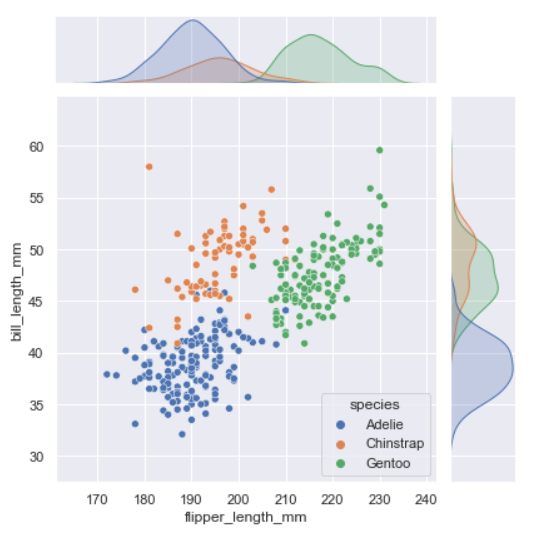

### 번외2(pairplot)
1. 두가지 변수 조합을 한번에 확인함.

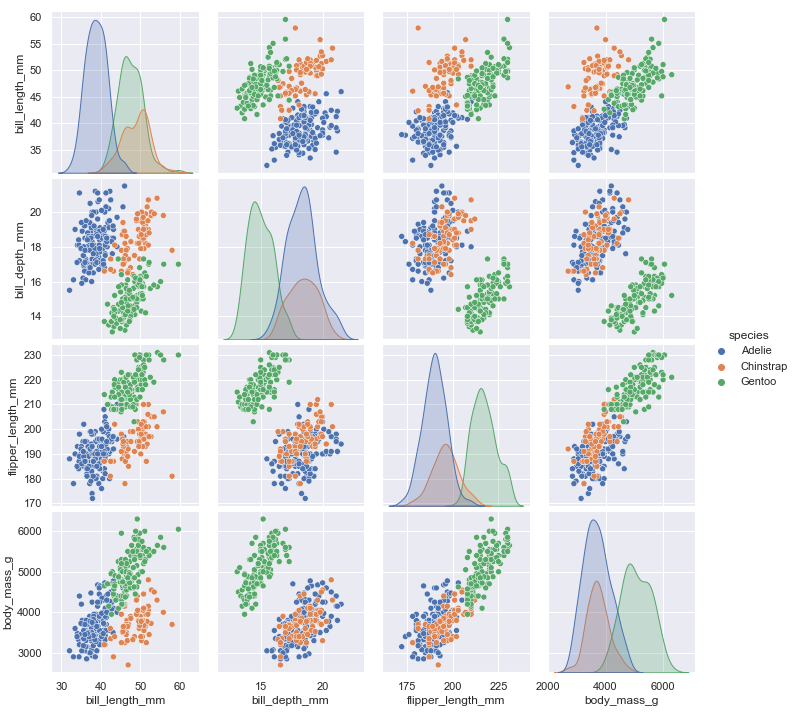

출처 : https://hwi-doc.tistory.com/entry/seaborn-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

#### 축함수 예시

<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

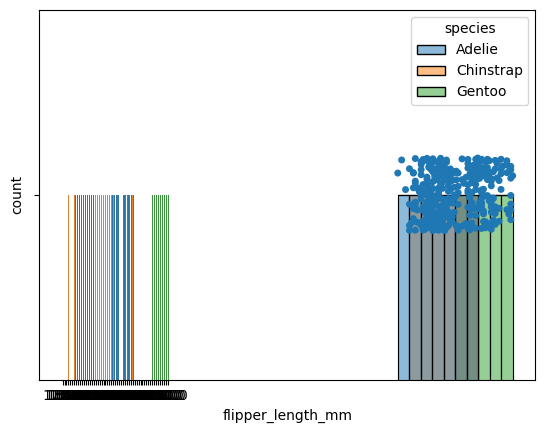

In [10]:
# 축수준 함수 : 겹치기 가능함
sns.countplot(data=penguins, x="flipper_length_mm", hue="species")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
sns.stripplot(data=penguins, x="flipper_length_mm", hue="species")


<AxesSubplot:xlabel='flipper_length_mm', ylabel='count'>

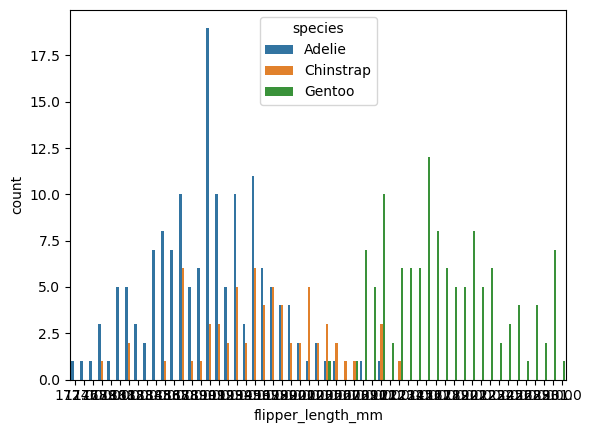

In [11]:
sns.countplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

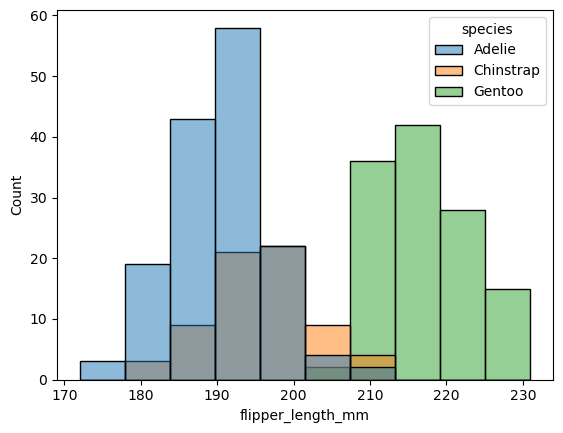

In [12]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm'>

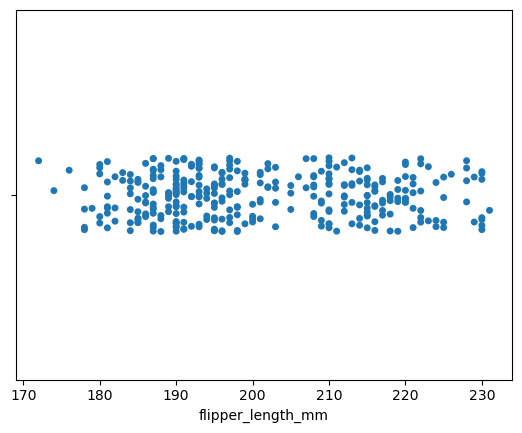

In [15]:
sns.stripplot(data=penguins, x="flipper_length_mm", hue="species")

#### 그림함수 예시

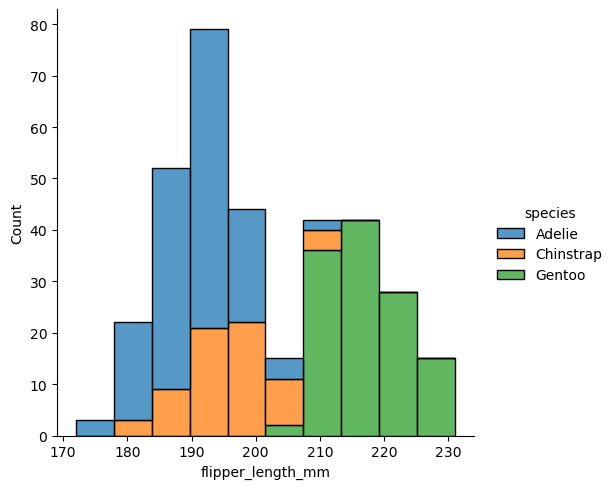

In [13]:
# multiple='stack' : 하나의 막대에 쌓아서 표현해 준다.(값을 쌓아서 표현해줌)
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

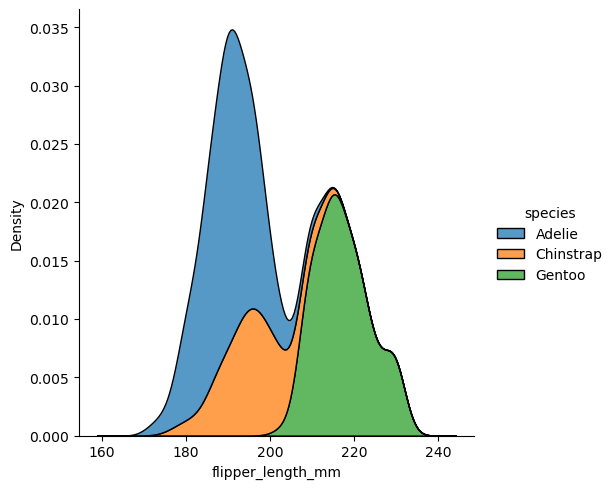

In [14]:
#  커널 밀도 플롯을 그리려면 동일한 코드(displot)를 사용하고 kind = 'kde'를 사용하거나
#  kdeplot() 함수를 사용해야한다.
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

- Figure 수준 플롯이 대부분 축 수준 플롯과 비슷해 보이지만 몇가지 차이점이 있다.
- 범례가 플롯 외부에 배치되어 있다.
- Figure 수준 함수가 제공하는 가장 유용한 기능은 여러 subplot이 있는 Figure를 쉽게 생성할 수 있다는 것이다.
- 예를들어, 동일한 축에 펭귄의 각 종에 대한 세가지 분포를 쌓는 대신 그림의 열에 각 분포를 플로팅하여 '패싯'할 수있다.

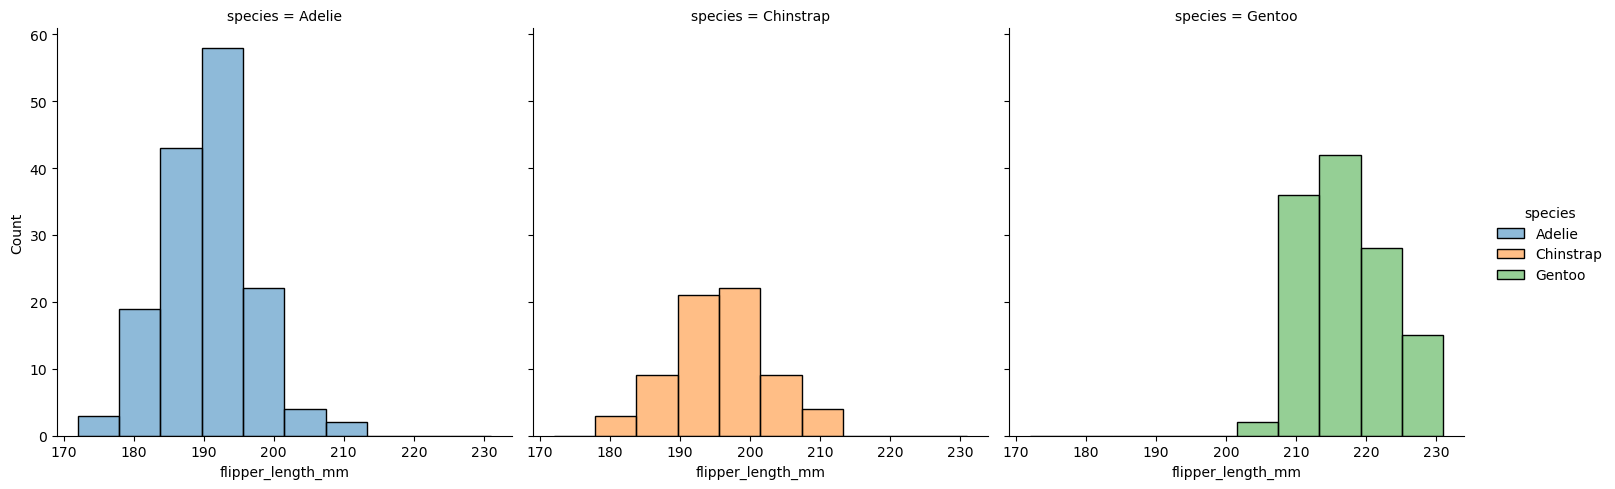

In [7]:
# col='컬럼' : 컬럼의 unique 값에 따라 그래프를 따로 그려낸다
# col_wrap=int : 따로 그래프를 그려낼 때 한줄에 몇개의 그래프를 표시할지 정한다(int값 만큼)

sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

- Figure 수준 함수는 해당하는 축 수준 함수를 래핑하고 종류별 키워드 인수(예:히스토그램의 bin크기)를 기본 함수로 전달 한다.
- 즉, 유연성이 떨어지지는 않는다. 그러나 단점이 있다.
- 종류별 매개변수가 함수 서명이나 독스트링에 설명되어 있지 않다.(기능에 대한 설명이 없다)
- 일부 기능은 검색하기 어려울 수 있으며, 특정 목표를 달성하는 방법을 이해하기 전에 설명서의 서로 다른 두 페이지를 살펴봐야 할 수도 있다.
=> 다른 기능을 사용 가능하여 유연한 인터페이스를 가지지만 해당 기능은 설명에 쓰여있지 않아서 검색이 어렵다.

### 축 수준 함수는 독립적인 플롯을 만든다.
1. axes-level 함수는 matplotlib의 drop-in replacements 처럼 사용되어진다.
2. axes-level 함수는 matplotlib.pyplot.gca() 내부적으로 호출하여 matplotlib 상태 머신 인터페이스에 연결하여 '현재활성' 축에 플롯을 그립니다.
3. 그러나 이들은 'ax=' 객체지향 인터페이스와 통합되고 각 플롯이 어디로 가야하는지 정확하게 지정할 수 있는 인수를 추가로 허용한다.

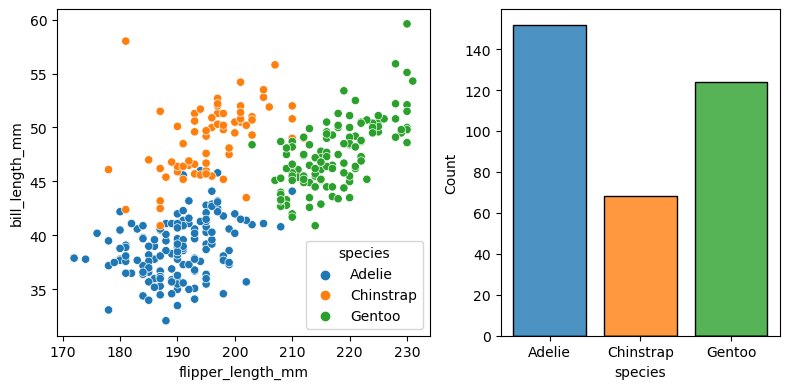

In [14]:
# ax=axs[0] 처럼 지정하여 객체지향이 가능하다.
# 더 필요한 인수 변경을 하기 위해서 axs[0]으로 지정하여 작성하면 해당 그래프만 변화 시킬 수 있다.
# alpha = int : 투명도 조절
# shrink = int : 막대폭조절
# lenend = True/False : 범례 표시 설정(default가 True)
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### 그림 수준 함수는 자신의 그림을 소유한다.
1. 반대로 그림 수준의 함수는 다른 plot과 (쉽게) 구성될 수 없다.(병합 될 수 없다)
2. 설계상 초기화를 포함하여 고유한 그림을 '소유'하므로 그림 수준 함수를 사용하여 기존 축에 플롯을 그리는 개념이 없다.
3. 이 제약 조건을 통해 그림 수준 함수는 범례를 플롯 외부에 배치하는 것과 같은 기능을 구현할 수 있다.

4. 그럼에도 불구하고 반환하는 객체의 matplotlib 축에 액세스하고 plot에 다른 요소를 추가하여 그림수준 함수가 제공하는 것 이상을 수행할 수 있다.

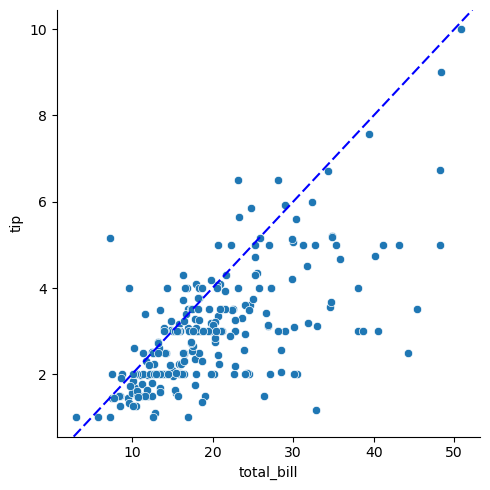

In [4]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

### 그림 수준 함수에서 플롯 사용자 지정
1. Figure-level 함수 FacetGrid는 서브플롯 구성에 대해 '스마트'한 방식으로 플롯의 속성을 사용자 정의하기 위해 몇가지 방법이 있는 인스턴스를 반환한다.
2. 예를 들어 한 줄의 코드를 사용하여 외부 축의 레이블을 변경할 수 있다.
3. 하지만, 이 방법은 matplotlib API의 일부가 아니며 그림 수준 함수를 사용할 때만 존재한다는 점을 기억해야한다. 그리고 약간의 추가 복잡성이 있다.

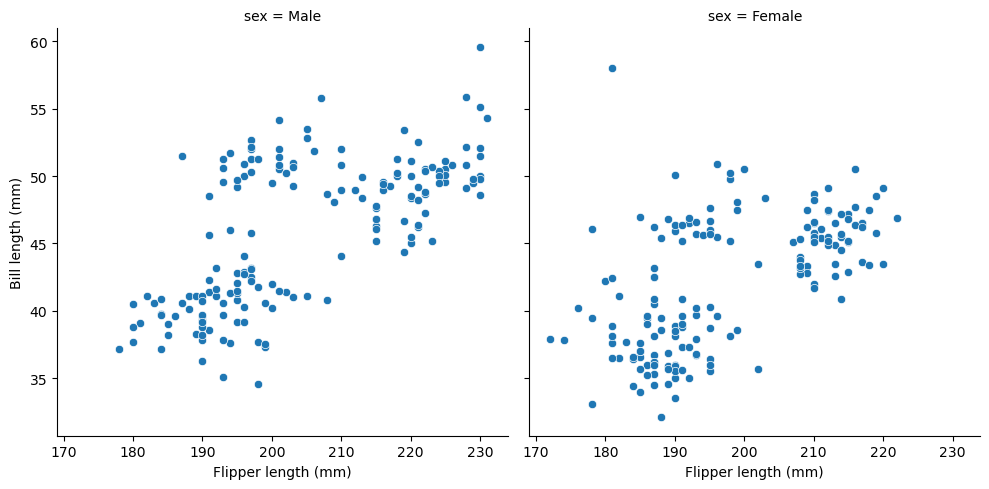

In [15]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

### 그림 크기 지정
1. matplotlib plot 크기를 늘리거나 줄이려면 전역 rcParams에서 (예: figsize 매개변수 사용) 또는 그림 개체에서 메서드를 호출 하여 전체 그림의 너비와 높이를 설정할 수 있다.(plt.set_size_inch())
2. seaborn에서 축 수준 함수를 사용할 때 동일한 규칙을 적용하여 사용할 수 있다.
3. plot의 크기는 속한 그림의 크기와 해당 그림의 축 레이아웃에 따라 결정된다.
---
1. 그림 수준 함수를 사용할 때 몇가지 주요 차이점이 있다.
2. 첫째, 함수 자체에는 그림 크기를 제어하는 매개변수가 있다.(실제로 FacetGrid는 그림을 관리하는 기본 매개변수임)
3. 둘째, 이러한 매개변수(height & aspect)는 matplotlib의 width & height 체계와 조금 다르다
4. width = height * aspect 임
5. 가장 중요한 것은 매개변수가 전체 그림의 크기가 아니라 각 하위 그림의 크기에 해당한다는 것이다.

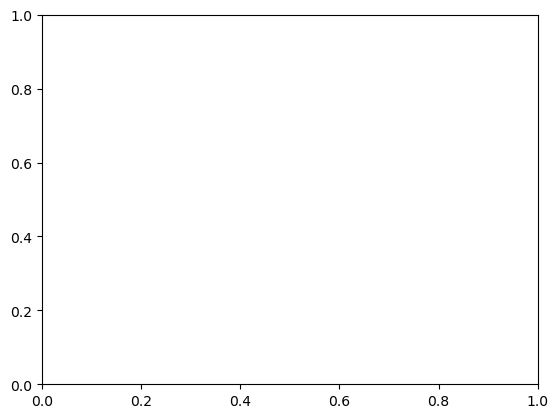

In [16]:
f, ax = plt.subplots()

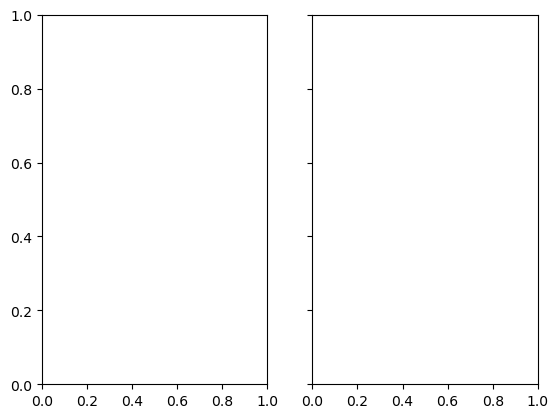

In [17]:
# 열이 여러개인 그림은 전체 크기가 같지만 축은 공간에 맞추기 위해 가로로 압축된다.
f, ax = plt.subplots(1, 2, sharey=True)

- 반대로, Figure-level 함수로 만들어진 것은 정사각형이된다.
- 시현하기 위해서는 FacetGrid를 사용하여 빈 plot을 만들어야 한다.
- 이것은 relplot(), displot(), catplot()와 같은 함수의 뒤에서 발생한다.
 => rel, dis, catplot을 실행하면 FacetGrid로 실행된다는 뜻

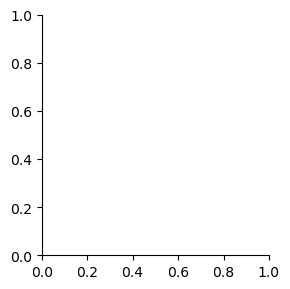

In [20]:
g = sns.FacetGrid(penguins)

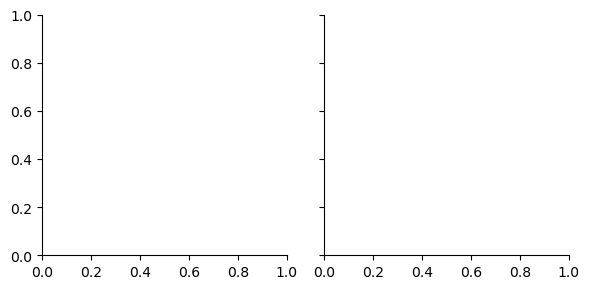

In [21]:
# 추가 열이 추가되면 그림 자체가 더 넓어져서 하위 그림의 크기와 모양이 동일해집니다.
g = sns.FacetGrid(penguins, col="sex")

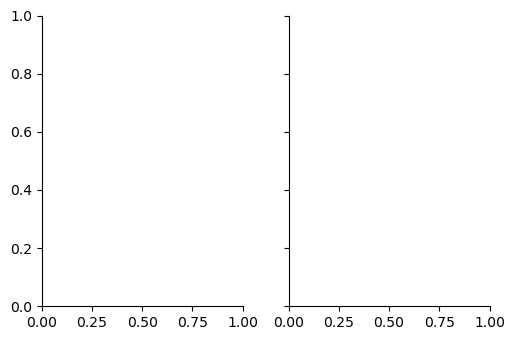

In [22]:
# 그리고 그림의 총 행과 열 수를 고려하지 않고 각 서브플롯의 크기와 모양을 조정할 수 있습니다.
# 결론은 전체 그림 크기를 어떻게 조정해야 하는지 생각하기 위해 멈추지 않고 패싯 변수를 할당할 수 있다는 것입니다. 
# 단점은 그림 크기를 변경하려는 경우 matplotlib에서와 약간 다르게 작동한다는 점을 기억해야 한다는 것입니다.
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

### Figure-level 함수의 상대적  장점
1. 장점
- 데이터 변수에 의한 손쉬운 패싯
- 기본적으로 플롯 외부에 범례가 있다.
- 손쉬운 그림 레벨 커스터마이징
- 다양한 그림과 크기 매개 변수화

2. 단점
- 함수 서명에 없는 많은 매개변수(설명이 없어 어떤 기능을 쓸수 있는지 파악을 따로해야됨)
- 더 큰 matplotlib 그림의 일부가 될 수 없다
- matplotlib과 다른 API
- 다양한 그림 크기 매개변수화

* 그림수준의 함수를 사용하는데 좋지 않은 상황은 복잡하고 여러 다른 종류의 plot으로 구성된 하나의 그림을 만들 경우이다.
* 이 때는 matplotlib을 사용하여 그림을 직접 설정하고 axes-level 함수를 사용해서 개별 구성 요소를 채우는 것이 좋다
=> 한 plot 위에 여러 plot(점, 막대, 선 등등)을 한번에 나타내고자 할때 axes-level 함수 또는 matplotlib으로 섬세하게 설정하는게 낫다


### 데이터에 대한 여러 보기 결합
두 가지 중요한 플로팅 기능(jointplot(), pairplot())은 위에서 설명한 두 분류체계에 구분하여 포함시킬 수 없다.

- jointplot(), pairplot() 는 서로 다른 모듈의 여러 종류의 플롯을 사용하여 데이터 세트의 여러 측면을 단일 그림으로 나타낸다.
- 두 plot은 그림수준 함수이며 기본적으로 여러 하위 그림이 있는 그림을 만든다.
- 그러나 그림을 관리하기 위해 서로 다른 개체를 사용한다. 
   => JointGrid / PairGrid

#### jointplot() 
- 각 변수의 단변량 분포를 개별적으로 보여주는 주변 축을 추가
- 두 변수의 관계 또는 공동 분포를 plotting 해준다

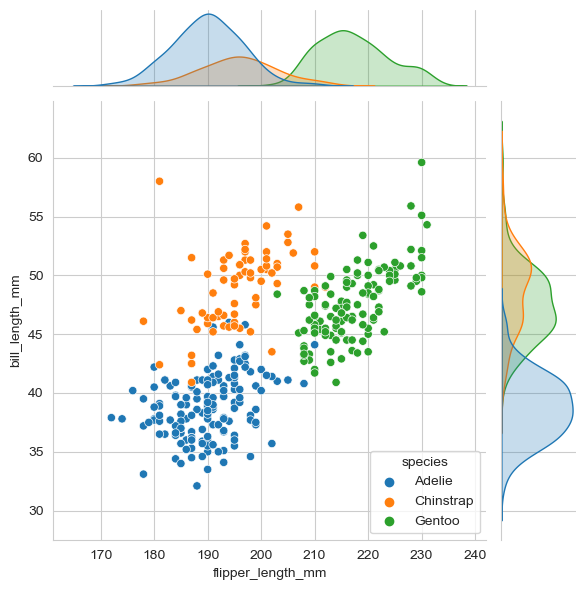

In [8]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
sns.set_style('darkgrid')

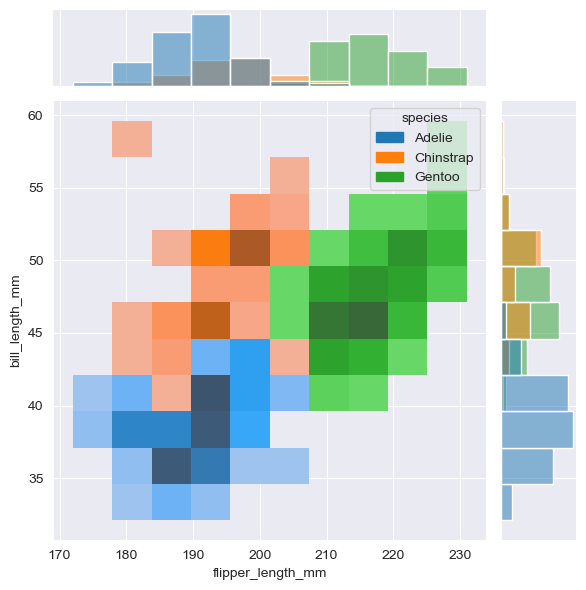

In [10]:
# 옵션을 변경하여 다르게 표현도 가능하다(kind ='hist')
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

#### pairplot()
- 변수의 모든 쌍별 조합에 대한 관계, 분포를 동시에 시각화 해준다
- 축 수준 함수 (scatterplot() 및 kdeplot()) kind를 쓴 것을 합쳐놓은 것과 비슷

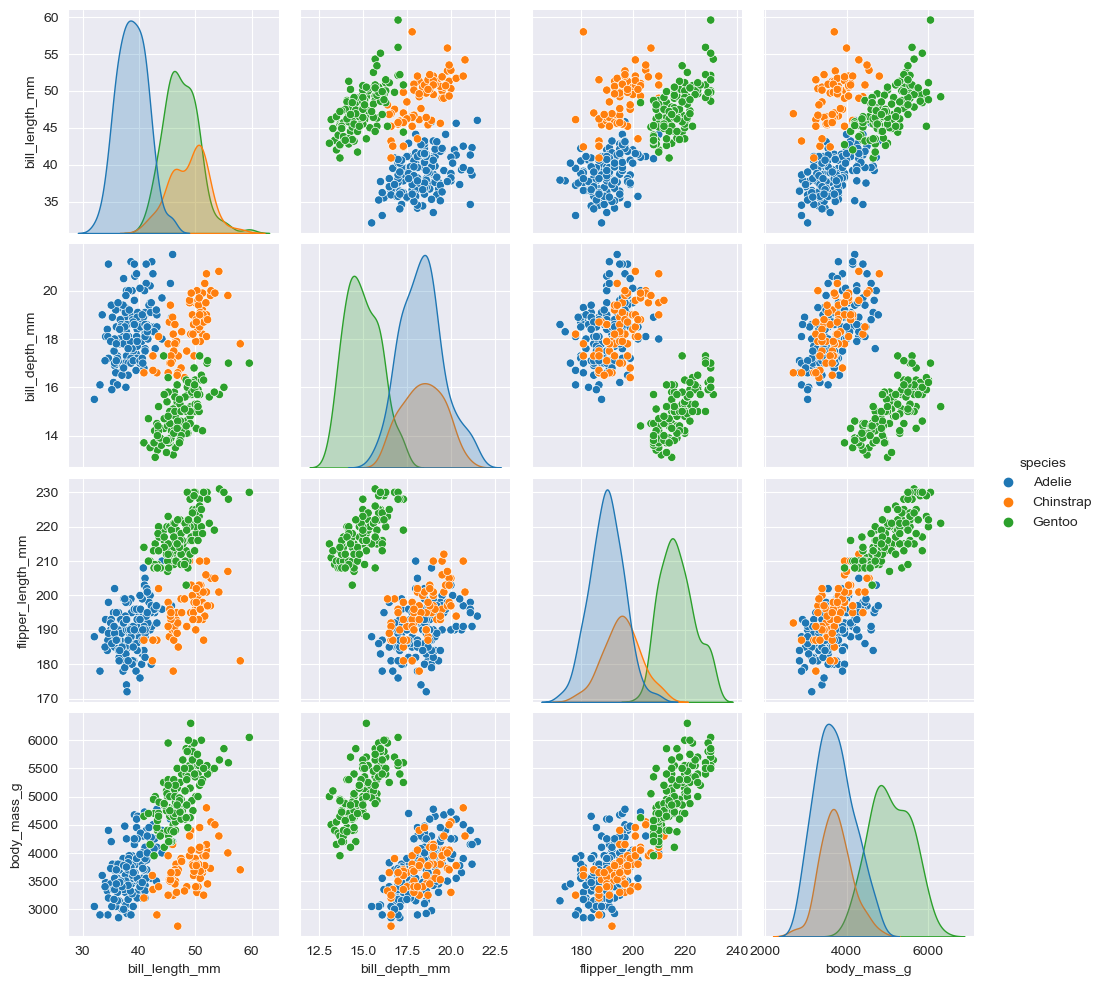

In [9]:
sns.pairplot(data=penguins, hue="species")

---

### seaborn에서 허용하는 데이터 구조
- x에 대해 plotting 할 때 y각 변수는 벡터여야한다.

긴 형식 데이터 vs 넓은 형식 데이터



#### 1. 긴 형식 데이터
- 각 variable은 열이다
- 각 observation은 행이다.
- 장점은 plot의 명시적 사양에 적합하다.
- variable과 observation이 명확하게 정의될 수 있는 한 임의의 복잡성 데이터 세트를 수용할 수 있다.
- 그러나 이 형식은 머리 속에 있는 데이터의 모델이 아닌 경우가 많기 때문에 익숙해지는데 시간이 걸린다.
- 데이터를 올바른 형식으로 가지고 있으면 더 이상 구조에 대해 생각할 필요가 없다.
플롯에 포함된 변수에 대해서만 생각하여 플롯을 디자인할 수 있다.
(예를 들어, 각 연도의 월별 시계열을 나타내는 선을 그리려면 간단히 변수를 재할 당하면된다.)

In [10]:
# 3개의 변수(year, month, number of passenger)가 열에 있다.
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


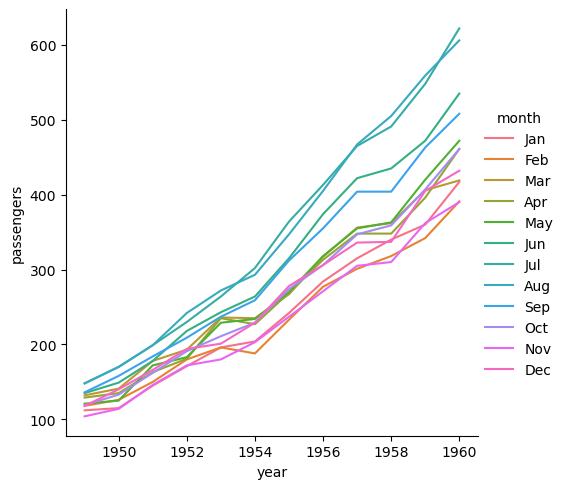

In [8]:
# 긴 형식의 데이터를 사용하면 테이블의 열을 변수 중 하나에 명시적으로 할당하여 plot에서 역할이 부여된다.
# 예를들어, 연간 승객 수의 월별 도표를 작성하면 다음과 같다.
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

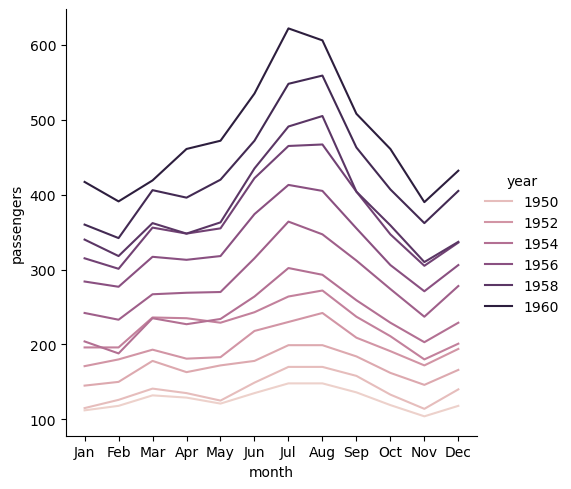

In [14]:
# x, y할당을 바꿔주기만하면 그래프를 손쉽게 바꿀 수 있다.
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

### 2. 넓은 형식 데이터
- 간단한 데이터 세트의 경우 열과 행에 다양한 수준의 변수가 포함된 스프레드시트에서 데이터를 보는 방식으로 데이터를 생각하는 것이더 직관적인 경우가 많다.
- 넓은 형식은 데이터세트로 동일한 리매핑을 달성하려면 테이블을 바꿔줘야한다.


In [11]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


- Seaborn은 x,y에 할당되지 않았을 때, data를 넓은 형식으로 처리한다.

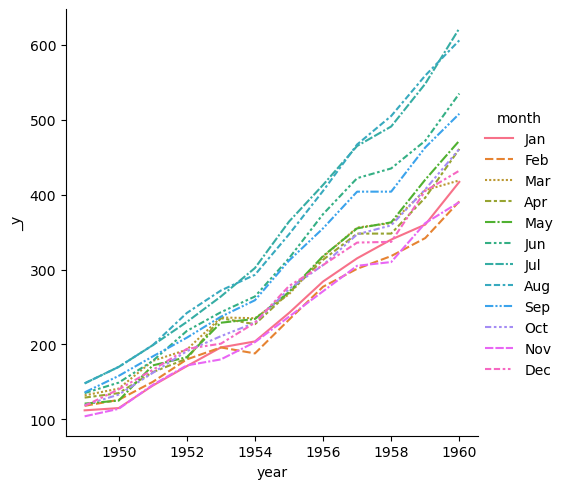

In [12]:

sns.relplot(data=flights_wide, kind="line")

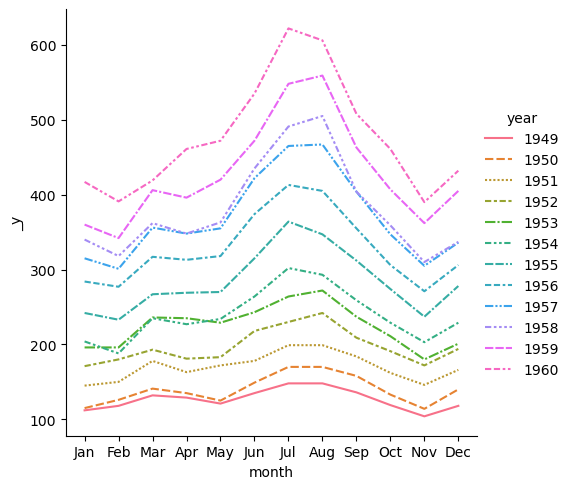

In [15]:
# - 넓은 형식은 데이터세트로 동일한 리매핑을 달성하려면 테이블을 바꿔줘야한다.
sns.relplot(data=flights_wide.transpose(), kind="line")

- x, y에 변수 할당이 없어 각 plot 유형이 넓은 형식 데이터의 차원과 plot 역할
간에 고정 mapping을 정의 해야한다.
- 이 자동 매핑은 plot 유형에 따라 다를 수 있어 예측하기가 어렵다.
- 예를 들어 범주형 도표는 테이블의 열차원을 x에 할당한 다음 행 전체에서 집계한다.(인덱스를 무시한다)

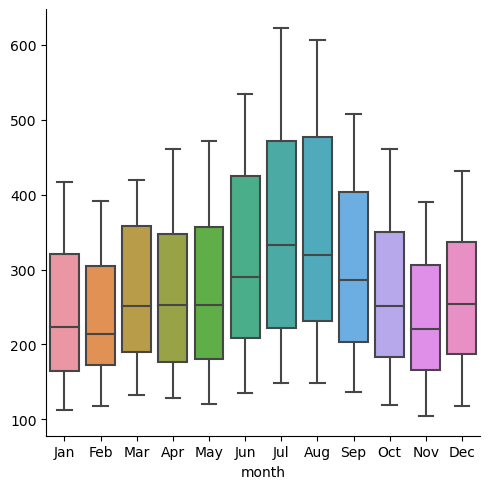

In [17]:
sns.catplot(data=flights_wide, kind="box")

- pandas에서는 넓은 형식 데이터를 사용할 때 몇 가지 변수(3개 이하)로 제한된다.
=> 행, 열, 데이터값의 의미 이렇게 3개 이하로만 됨
- 이는 seaborn이 pandas가 테이블 형식으로 추가 변수를 나타내는 방식인 다중 인덱스 정보를 사용하지 않기 때문입니다. xarray 프로젝트는 넓은 형식의 데이터를 더 높은 차원으로 일반화한 것으로 간주할 수 있는 레이블이 지정된 N차원 배열 개체를 제공합니다 . 현재 seaborn은 의 객체를 직접 지원하지 않지만 메서드를 사용하여 xarraylong-form으로 변환한 다음 다른 long-form 데이터 세트와 마찬가지로 seaborn에서 플롯할 수 있습니다.pandas.DataFrameto_pandas

요약하면 긴 형식 및 넓은 형식의 데이터 세트를 다음과 같이 생각할 수 있습니다.

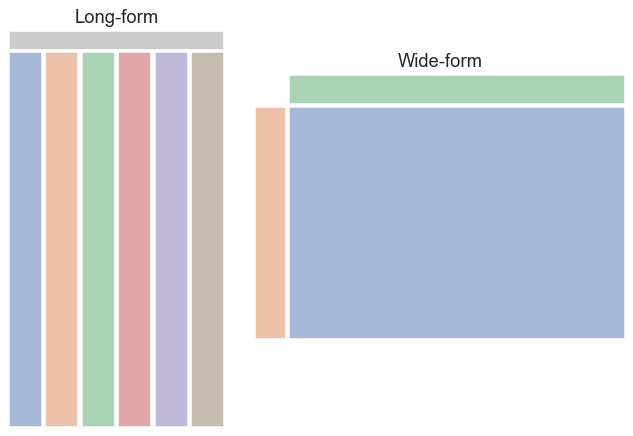